In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_classification

In [159]:
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0, n_classes=2,n_clusters_per_class=1,random_state=41, hypercube=False, class_sep=10)

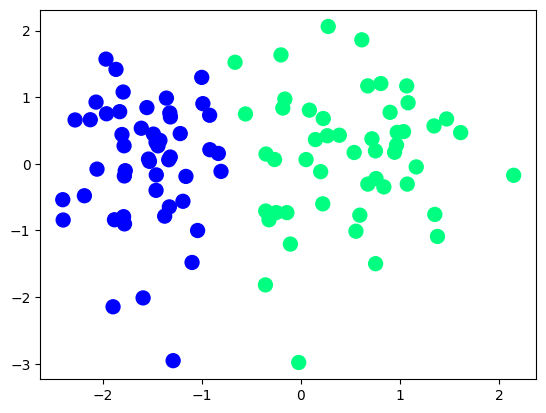

In [160]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.show()

In [161]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    
    return weights[0],weights[1:]

In [162]:
def step(z):
    return 1 if z > 0 else 0

In [163]:
step(0.0294)

1

In [164]:
intercept_,coef_ = perceptron(X,y)
print(intercept_)
print(coef_)

1.0
[1.2592872  0.12459236]


In [165]:
m = -(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [166]:
X_input = np.linspace(-3,3,100)
y_input = m*X_input+b

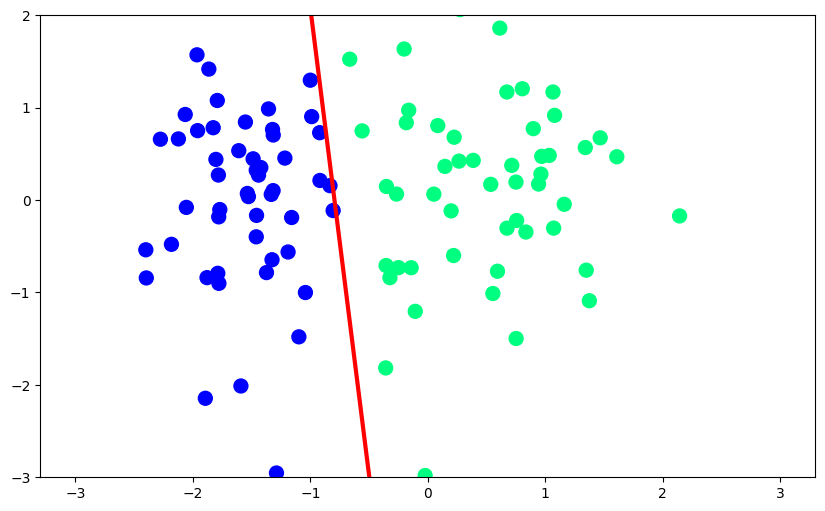

In [167]:
plt.figure(figsize=(10,6))
plt.plot(X_input,y_input,color='red', linewidth=3)
plt.scatter(X[:,0], X[:,1],c=y,cmap='winter', s=100)
plt.ylim(-3,2)
plt.show()

In [168]:
def perceptron(X,y):
    m=[]
    b=[]

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr=0.1

    for i in range(200):
        j=np.random.randint(0,100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))

    return m,b

In [169]:
m,b = perceptron(X,y)


In [170]:

from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

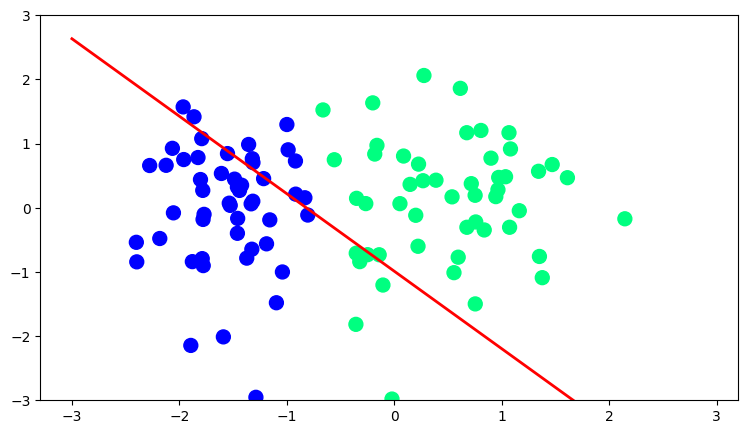

In [171]:
fig, aX = plt.subplots(figsize=(9,5))

X_i = np.arange(-3,3,0.1)
y_i = X_i*m[0]+b[0]
aX.scatter(X[:,0], X[:,1],c=y,cmap='winter',s=100)
line, = aX.plot(X_i,X_i*m[0]+b[0],'r-',linewidth=2)
plt.ylim(-3,3)

def update(i):
    label = 'epoch {0}'.format(i+1)
    line.set_ydata(X_i*m[i]+b[i])
    aX.set_xlabel(label)

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)
plt.show()

In [172]:
from sklearn.linear_model import LogisticRegression
lo = LogisticRegression()
lo.fit(X,y)

LogisticRegression()

In [173]:
m = -(lo.coef_[0][0]/lo.coef_[0][1])
b = -(lo.intercept_/lo.coef_[0][1])

In [174]:
X_input1 = np.linspace(-3,3,100)
y_input1 = m*X_input+b

(-3.0, 2.0)

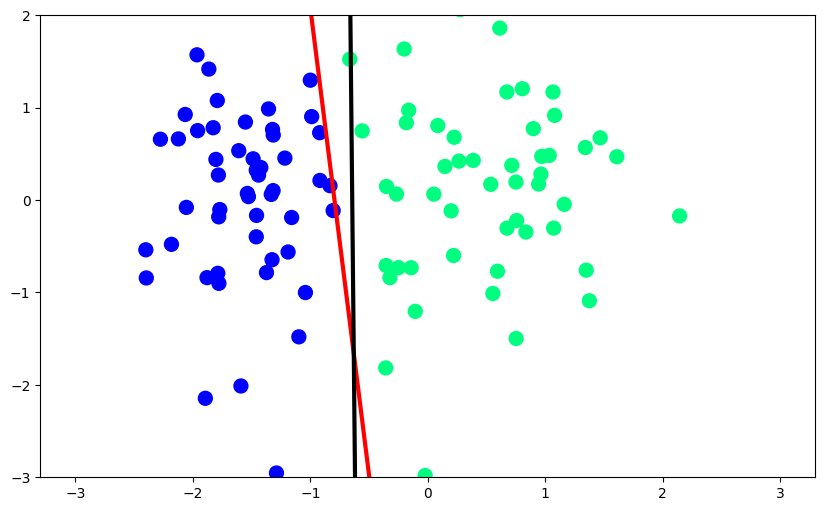

In [175]:
plt.figure(figsize=(10,6))
plt.plot(X_input,y_input, color='red', linewidth=3)
plt.plot(X_input1,y_input1,color='black', linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter', s=100)
plt.ylim(-3,2)

In [ ]:
# https://github.com/campusx-official/100-days-of-machine-learning/blob/main/day58-logistic-regression/perceptron-trick.ipynb